In [1]:
import os
import glob
import re
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter, DayLocator
import pandas as pd
from svgpath2mpl import parse_path
import datetime
import matplotlib as mpl

In [2]:
%matplotlib notebook

In [3]:
#Initiating colors so it's not a boring plot
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
]

In [4]:
theta = np.linspace(0, 2 * np.pi, 100)

# Generating x and y data
x = 16 * ( np.sin(theta) ** 3 )
y = 13 * np.cos(theta) - 5* np.cos(2*theta) - 2 * np.cos(3*theta) - np.cos(4*theta)

<IPython.core.display.Javascript object>


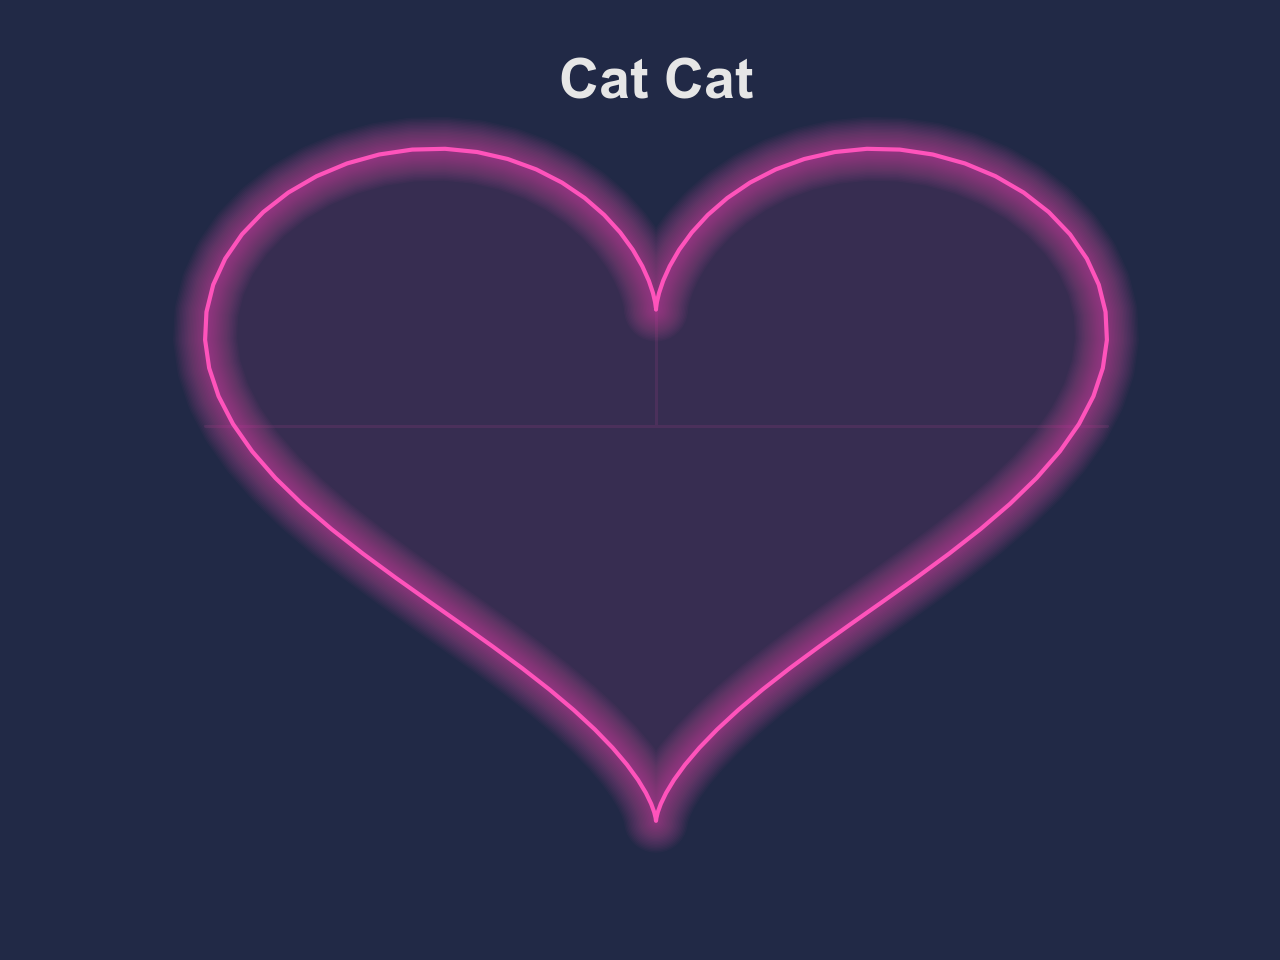

In [6]:

fig, ax = plt.subplots()

## Initial set-up of plot colors and border colors
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
    
# Plotting
n_lines = 20
diff_linewidth = 1.05
alpha_value = 0.03
lines = []

lines = [plt.plot([], [], linewidth=2+(diff_linewidth*(i+1)), alpha=alpha_value, color=colors[1])[0] for i, _ in enumerate(range(n_lines))]
lines.append(plt.plot([],[], colors[1])[0])

def update(num):
    for line in lines:
        line.set_data(x[:num], y[:num])
#     ax.fill_between(x[:num], y[:num], color = colors[1], alpha = 0.1) 
    return lines,

anim = ani.FuncAnimation(fig, update, frames = len(x),  interval=100, blit=True, repeat = False)

## Clear up grid and stuff
ax.grid(False)
plt.axis('off')
plt.grid(b=None)

plt.fill_between(x, y, color = colors[1], alpha = 0.1) 
plt.title('Cat Cat', fontsize = 20, fontweight = 'bold')

anim.save('animnated_heart.mp4', fps=10, extra_args=['-vcodec', 'libx264'], bitrate = 500, dpi = 200, writer = 'ffmpeg')
plt.show()